<a href="https://colab.research.google.com/github/SHASHANKV9611/TexasSalaryPrediction/blob/main/Texas_govt_employee_salary_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("/content/salary.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (16,18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


1. Agency: It is the agency code for particular agency and the total number of agency are 113
2. AGENCY NAME: The dataset contain diiferent agencies working for texas government 
3. Last Name, First name, MI : These are names of the individual record
4. CLASS CODE: This is the unique code given each designation of the employee
5. CLASS TITLE: This is the job title/designation of the employee.
6. ETHNICITY: An ethnic group or ethnicity is a population group whose members identify with each other on the basis of common cultural type.
7. GENDER: It represent gender of the individual
8. STATUS: It represent the working hour and type of job(Temporary or permanent job)
9. EMPLOY DATE: Date of joining of the particular employee for particular job
10. HRLY RATE: This the compensation paid to employee per Hour of work done
11. HRS PER WK: This is the number of working hours per week done by the employee.
12. MONTHLY: This is the salary paid to employee per month
13. ANNUAL: This is the salary paid to employee per year
14. STATE NUMBER: a unique number assigned to a business or organization by the state where the business operates, and is used for filing taxes and hiring employees.
15. duplicated: This columns represents the weather record is repeated/duplicated or not
16. multiple_full_time_jobs: It shows that weather the each individual is working more then one job full time.
17. combined_multiple_jobs : The Combine_Multiple_job feature allows you to merge two or more jobs from the same market view into a single job.
18. summed_annual_salary: The total salary earned by an individual in a year including multiple full time jobs and combined multiple jobs.
19. hide_from_search : gives you the option for your searches to be hidden 

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head(10)

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.00000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
6,601,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,WILLIAM,J,1984,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/22/20,0.00000,40.0,5835.50,70026.00,1085586,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.00000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
8,520,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,03/04/20,49.40717,20.0,4281.95,51383.40,147334,True,NaN,NaN,NaN,True
9,537,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/19,0.00000,40.0,3447.25,41367.00,129635,True,1.0,NaN,NaN,NaN


In [8]:
df.shape

(149481, 21)

1. The shape of the dataframe is 149481*21
2. The data is having 149481 rows
3. The data is having 21 columns

In [9]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [10]:
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

1. The data is having total 21 attributes in that 16 don't have any missing values and 5 attributes having missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

1. The data is having data of data type int645, float64 and object

In [12]:
df.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


1. The standard deviation for multiple full time jobs is 0, hence their is no variance in the data, we can ignore that particular column.

2. The maximum salary earned by employee per year is 553500, where as minimum is 600.

3. The maximum working hour per week per employee is 70 hours, where as minimum is 1 hour.



In [13]:
df.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [14]:
df.rename({'AGENCY NAME': 'AGENCY_NAME', 'CLASS CODE': 'CLASS_CODE','CLASS TITLE':'CLASS_TITLE','EMPLOY DATE':'EMPLOY_DATE','HRLY RATE':'HRLY_RATE','HRS PER WK':'HRS_PER_WK','STATE NUMBER':'STATE_NUMBER'}, axis=1,inplace=True)

In [15]:
df.columns

Index(['AGENCY', 'AGENCY_NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS_CODE',
       'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE',
       'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'STATE_NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [16]:
#df['EMPLOY_DATE']=pd.to_datetime(df['EMPLOY_DATE'])
#df['exp'] = df['EMPLOY_DATE'].apply(calculate_exp)

In [17]:
df.head()

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


## **EXPLORATORY DATA ANALYSIS**

Univariate 

In [18]:
new_data=df[['AGENCY_NAME','CLASS_TITLE','ETHNICITY','GENDER','STATUS','HRS_PER_WK','MONTHLY','HRLY_RATE']]
new_data

,AGENCY_NAME,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRS_PER_WK,MONTHLY,HRLY_RATE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,29.0,9545.82,75.96150
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,4.0,1404.77,81.04454
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,29.0,9545.82,75.96150
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,4.0,1404.77,81.04453
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,3284.27,0.00000
...,...,...,...,...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,2899.00,0.00000
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,5500.00,0.00000
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,20.0,1120.60,12.93000
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,40.0,5744.16,0.00000


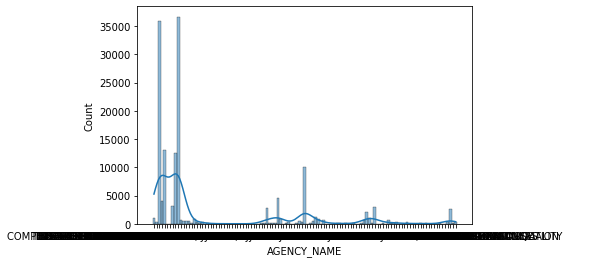

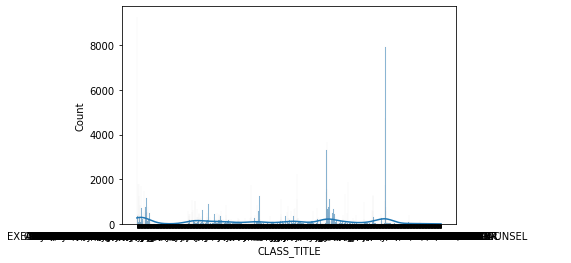

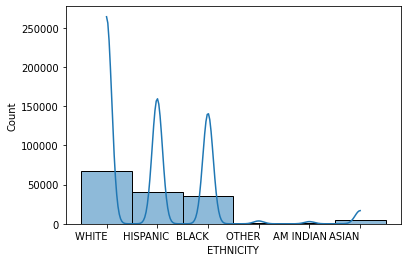

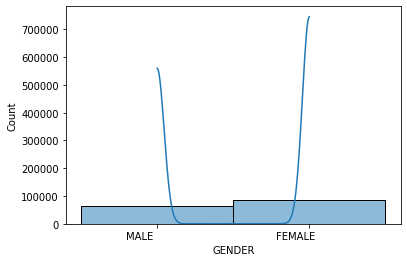

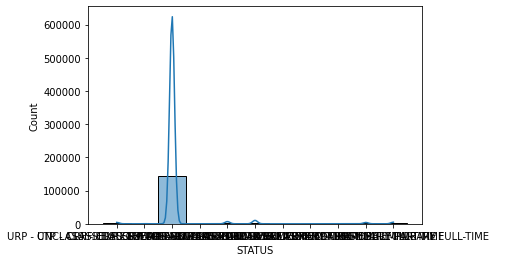

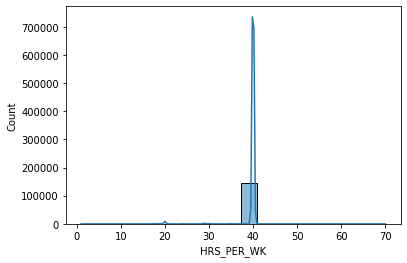

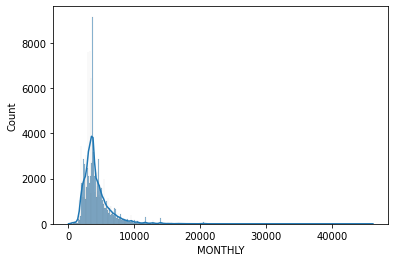

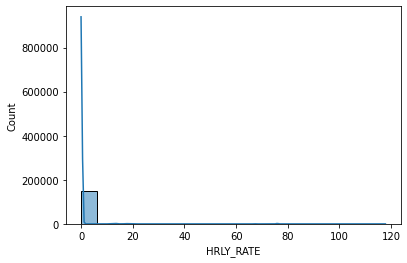

In [19]:
for columns in new_data:
  sns.histplot(x=columns, data=new_data,kde=True)
  plt.show()

1. Their is no much variation in Agency_Name, Class_title(no proper distribution).

2. The majority of employee working in **HEALTH AND HUMAN SERVICES COMMISSION** that is about 36667 and **TEXAS DEPARTMENT OF CRIMINAL JUSTICE is being in second place having 35926**

3. More number of employees belongs **WHITE ETHNICITY**, where OTHER and AM INDIAN are less.

4. More Employees are Female individuals.

5. Maximum number of employees works on CLASSIFIED_REGULAR_FULL_TIME

6. STATUS and HRS_PER_WK is having Normal distribution.

7. The majority number of empployees are working **40hrs per week**.

8. MONTHLY and HRLY_RATE is having right sckewed distribution.

9. The majority of employees having salary less then **10000$** per month.

10. The majority of employees having the hourly rate between 0 to 8$

# BI-variate Analysis

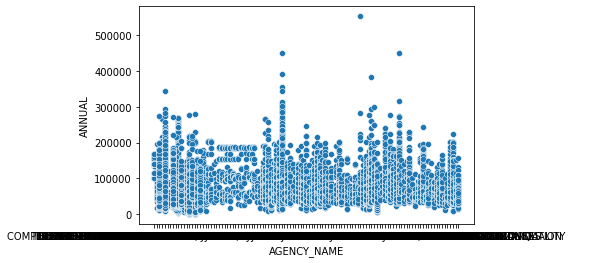

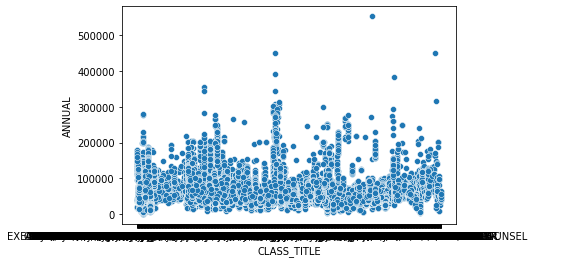

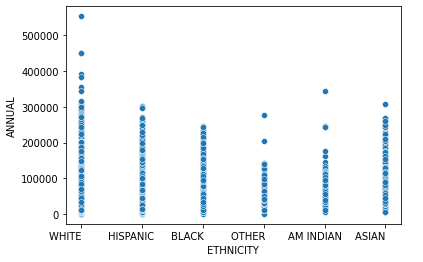

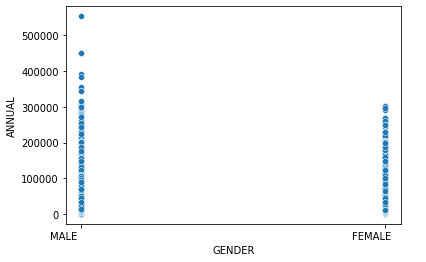

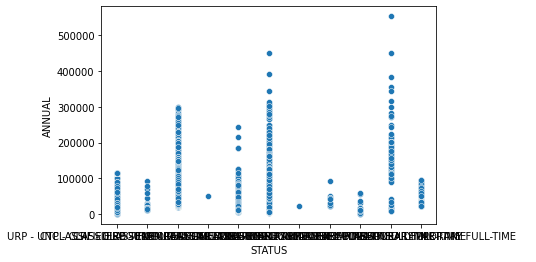

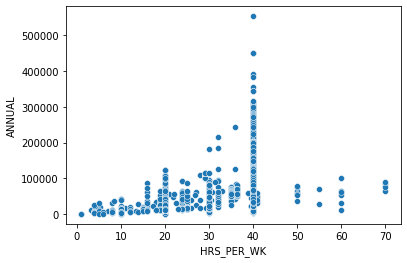

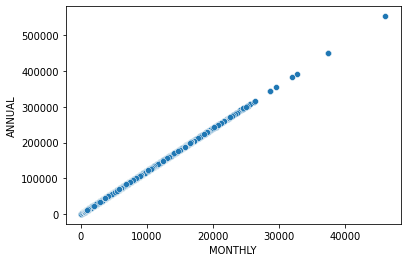

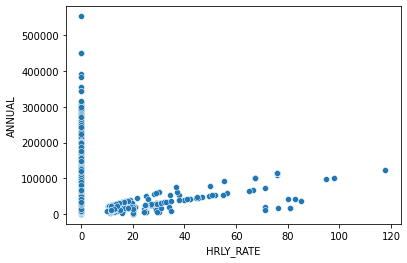

In [20]:
for columns in new_data:
  sns.scatterplot(x=columns,y=df.ANNUAL,data=new_data)
  plt.show()

1. Their no trend between Agency_Name and Annual.


2. Their is no trend between Class_title and Annual.


3. The Agencies are paying less then 200000$ to their majority of employees per year.


4. The Chief Scientific Officer(CLASS_TITLE) is getting highest salary that is about 553500$ per Annum.


5. In Class_title majority of designation individual getting less then 200000$.


6. Exculding White people others are getting less then 300000$ of salary per Annum.

7. highest salary paid to white people is above 500000$.

8. Males are getting more salary compared females.

9. The maximum salary earned by URF - UNCLASSIFIED REGULAR FULL-TIME and ERF - EXEMPT REGULAR FULL-TIME

10. The individual who are working between 30 to 40hrs/week are earning more salary compared to others.

11. HRLY_RATE and MONTHLY is having linear trend with Annual salary. 


In [21]:
# TO find the maximum observation in the column df.ANNUAL.max()

553500.0

In [ ]:
# df.loc[df['ANNUAL'] > 300000]

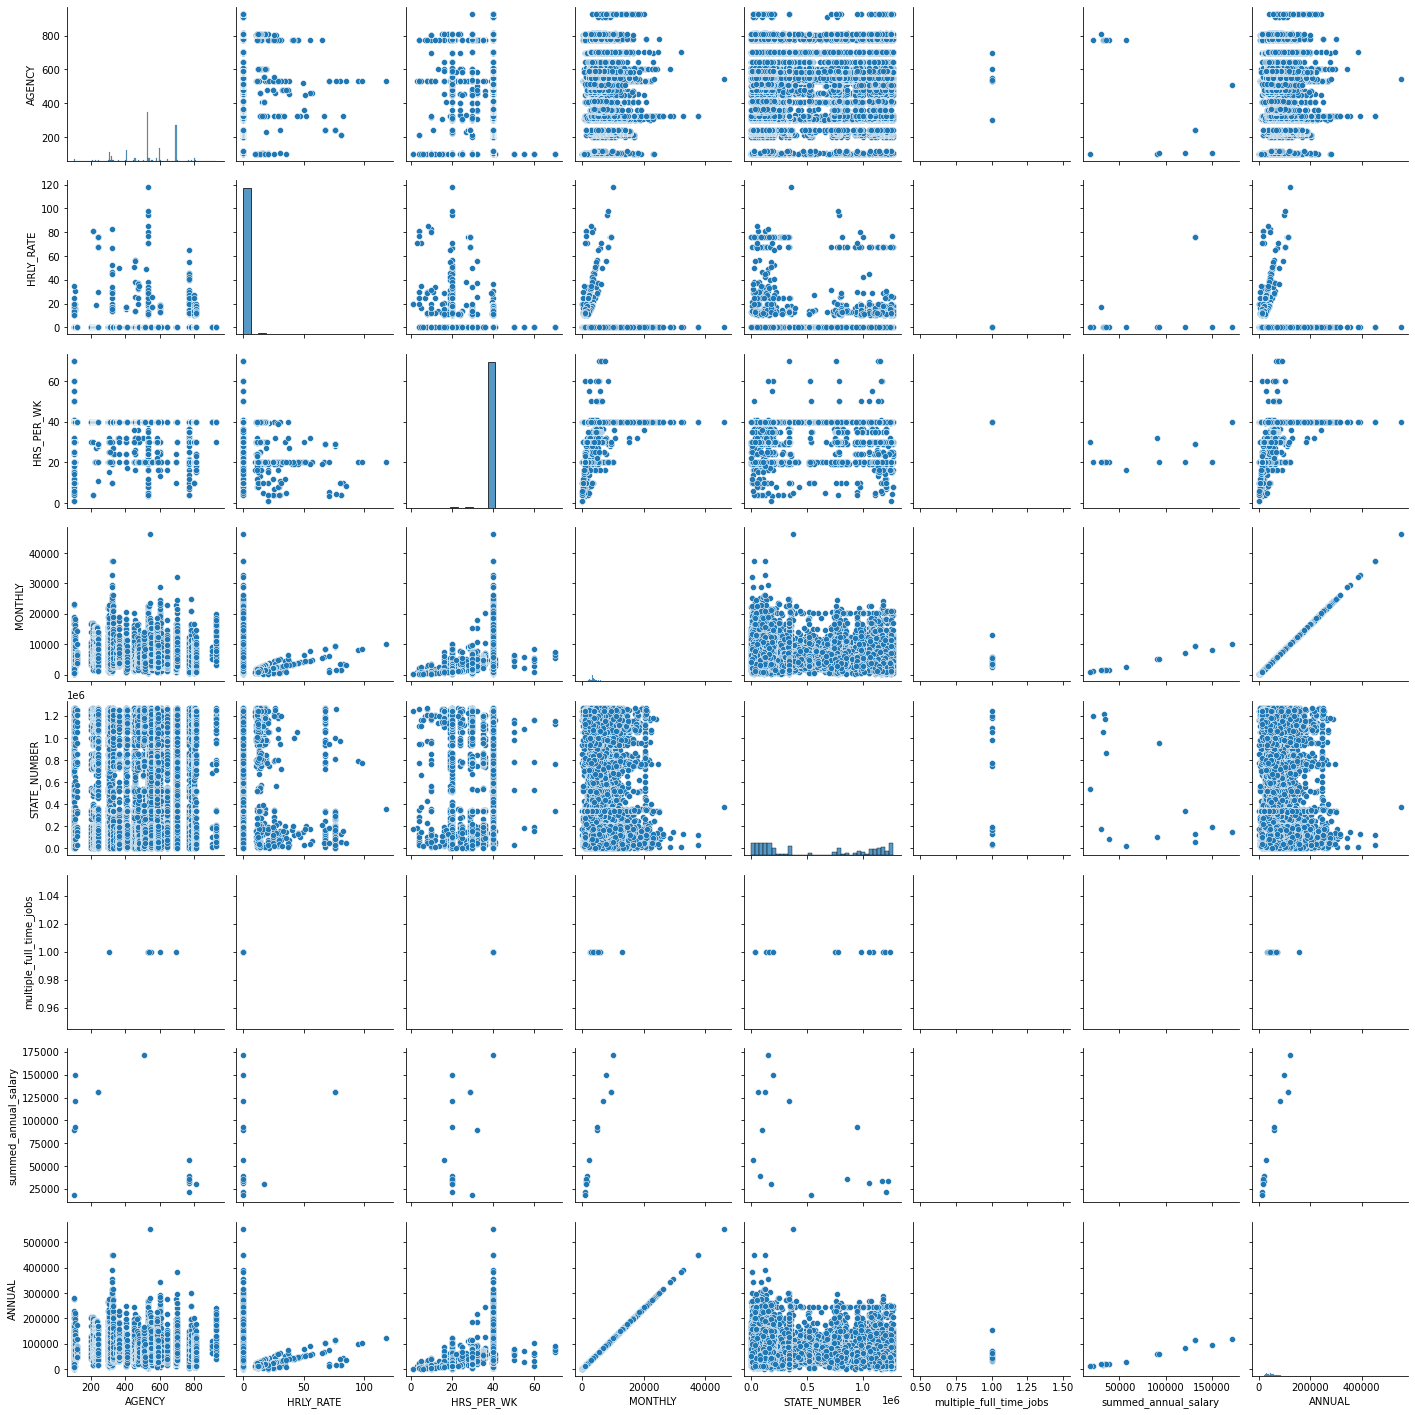

In [42]:
sns.pairplot(data=df[['AGENCY','HRLY_RATE','HRS_PER_WK','MONTHLY','STATE_NUMBER','multiple_full_time_jobs','summed_annual_salary','ANNUAL']])
plt.show()

# MULTI-VARIATE ANALYSIS

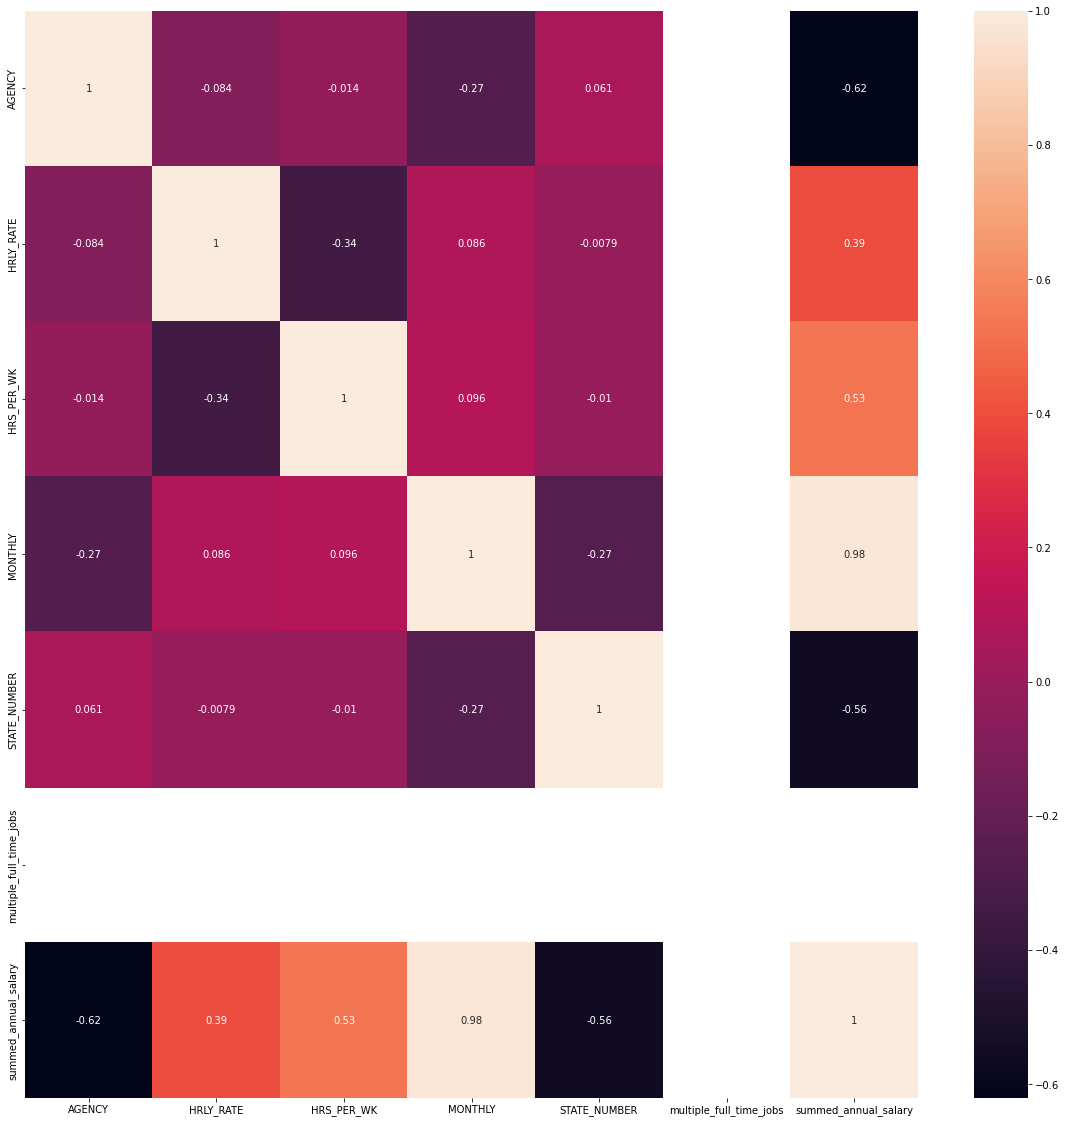

In [37]:
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(data=df.drop(['ANNUAL'],axis=1).corr(),annot=True)
plt.show()

1. Monthly is having 0.98 correlation with summed_annual_salary, so both columns are highly correlated with each other.

2. Multiple_full_time_job is highly correlated with every other feature.


In [44]:
df.head(10)

,AGENCY,AGENCY_NAME,LAST NAME,FIRST NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.00000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
6,601,TEXAS DEPARTMENT OF TRANSPORTATION ...,RICHTER,WILLIAM,J,1984,CONTRACT SPEC IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/22/20,0.00000,40.0,5835.50,70026.00,1085586,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.00000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
8,520,BOARD OF EXAMINERS OF PSYCHOLOGISTS ...,SPINKS,DARREL,D,E178,"EXEC DIR, BD OF EXAMS OF PSYCHOLOGISTS ...",WHITE,MALE,ERP - EXEMPT REGULAR PART-TIME,03/04/20,49.40717,20.0,4281.95,51383.40,147334,True,NaN,NaN,NaN,True
9,537,DEPARTMENT OF STATE HEALTH SERVICES ...,ADAMS III,LEE,A,1323,INSPECTOR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/19,0.00000,40.0,3447.25,41367.00,129635,True,1.0,NaN,NaN,NaN
